In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import re
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [20]:
# Load the full dataset 
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle = True)
dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [21]:
def text_clean(news):
    # Tokenize
    word_list = word_tokenize(news)
    
    # stop words
    stopwords_list = set(stopwords.words('english'))
    
    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]
    
    # remove very small words, length < 3 as they don't contribute any useful information
    word_list = [word for word in word_list if len(word) > 2]
    
    # lemmatize
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

### Exploratory Data Analysis

In [22]:
# preview of training data
news_df = pd.DataFrame({'News': dataset.data,
                        'Target': dataset.target})
news_df.head()

,News,Target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [23]:
# size of the entire dataset
news_df.shape

(18846, 2)

In [24]:
# number of topics
len(dataset.target_names)

20

In [25]:
# getting the target name into the dataset
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataset.target_names[x])
news_df.head()

,News,Target,Target_name
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


Text(0.5, 0, 'Count of News Articles')

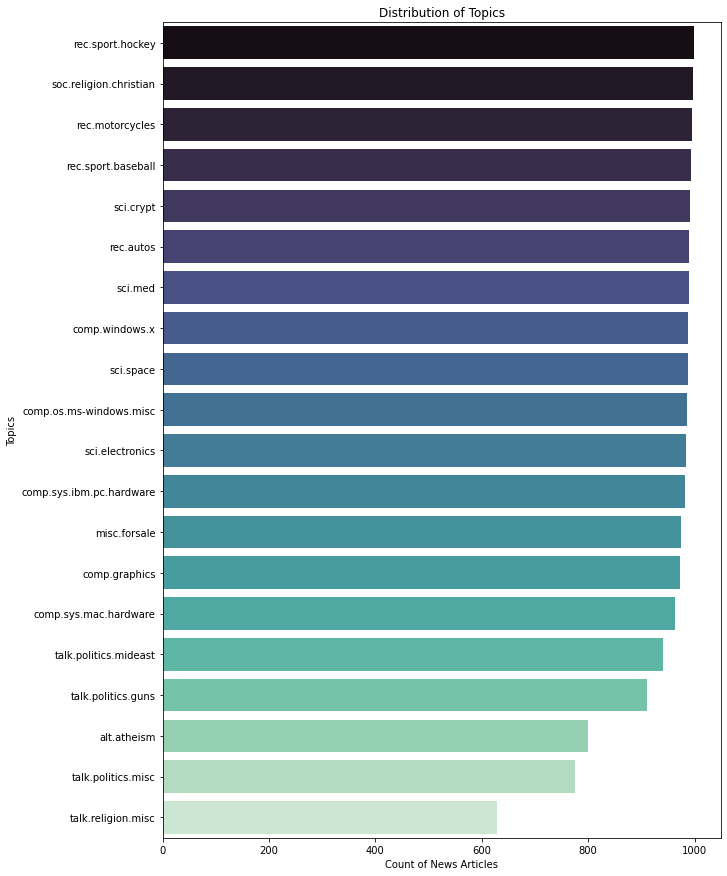

In [26]:
# plot the distribution of news topics
fig = plt.figure(figsize=[10,15])
ax = sns.countplot(y=news_df['Target_name'], palette='mako', order=news_df['Target_name'].value_counts().index)
plt.title('Distribution of Topics')
plt.ylabel('Topics')
plt.xlabel('Count of News Articles')

In [27]:
# any null value in the table
news_df.isna().sum()

News           0
Target         0
Target_name    0
dtype: int64

* The full dataset is consisted of 18846 news articles.
* The dataset has no null values 
* There are a total of 20 topics in this dataset.

In [28]:
# getting only the text data
pattern = re.compile(r'[^A-Za-z]+')
text_data = news_df['News'].str.replace(pattern, ' ').str.strip()
text_data.head()

0    I am sure some bashers of Pens fans are pretty...
1    My brother is in the market for a high perform...
2    Finally you said what you dream about Mediterr...
3    Think It s the SCSI card doing the DMA transfe...
4    I have an old Jasmine drive which I cannot use...
Name: News, dtype: object

In [42]:
# using the function text_clean to ge the meaningful words
processed_text_data = text_data.apply(lambda x: text_clean(x))
processed_text_data.head()

0    sure bashers Pens fan pretty confused lack kin...
1    brother market high performance video card sup...
2    Finally said dream Mediterranean That new The ...
3    Think SCSI card DMA transfer NOT disk The SCSI...
4    old Jasmine drive use new system understanding...
Name: News, dtype: object

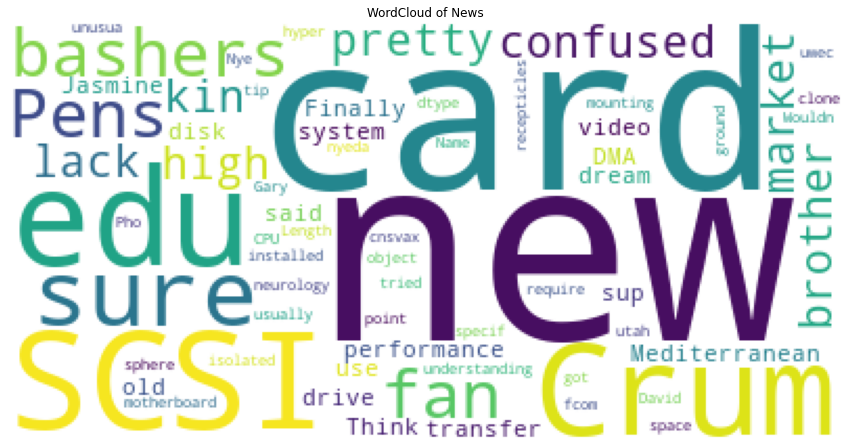

In [37]:
# plot word count for news text
wordcloud = WordCloud(background_color='white',
                      max_words=200).generate(str(processed_text_data))
fig = plt.figure(figsize=[15,15])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [38]:
# the length of the news description
description_len = news_df['News'].str.len()
description_len.describe()

count     18846.000000
mean       1169.667516
std        3858.748875
min           0.000000
25%         234.000000
50%         489.000000
75%         979.000000
max      158791.000000
Name: News, dtype: float64

In [43]:
# tf-idf on the news content and the key word of the content 
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_matrix = vectorizer.fit_transform(processed_text_data)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
max_tfidf_indices = tfidf_df.idxmax(axis=1)
title_tfidf = pd.DataFrame({'news':processed_text_data, 'key_word':max_tfidf_indices})
title_tfidf.head()

,news,key_word
0,sure bashers Pens fan pretty confused lack kin...,pens
1,brother market high performance video card sup...,pro
2,Finally said dream Mediterranean That new The ...,azerbadjan
3,Think SCSI card DMA transfer NOT disk The SCSI...,transfer
4,old Jasmine drive use new system understanding...,jasmine


In [ ]:
# all of the data need to be splitted into train and test data
# the original unprocessed data: news_df 
# the processed data: 
    # news_df['processed_news'] = processed_text_data.str.lower()